# Social Media Analysis Task

## Proje Özeti
**DigitalPulse**, sosyal medya yönetimi ve analizi alanında hizmet veren bir dijital ajanstır. Bu proje, artan sosyal medya yorumlarını analiz etmek, yorumları belirli konulara göre gruplandırmak ve sosyal medya görüşlerini destekleyici veya karşıt olarak sınıflandırmak amacıyla geliştirilmiştir. Ayrıca, sosyal medyanın genel eğilimlerini özetleyen sonuçlar üretmek hedeflenmektedir.

---

## Projenin Hedefleri
1. **Yorumları Konulara Göre Gruplama:**
   - Aynı konuya ait yorumları bir araya getirerek analiz edilebilir hale getirmek.

2. **Yorum Türlerini Sınıflandırma:**
   - Yorumları türlerine göre ayırmak (Claim, Counterclaim, Evidence, Rebuttal).
   
3. **Sonuç Üretimi:**
   - Yorumlardan elde edilen bilgileri özetleyerek, sosyal medyanın genel görüşünü belirten bir sonuç cümlesi oluşturmak.

4. **API Entegrasyonu:**
   - Analiz sonuçlarını bir API üzerinden erişilebilir hale getirmek ve gerçek zamanlı olay temelli (event-driven) bir sistem kurmak.
   - Bu aşama streamlit kullanılarak simüle edildi. API geliştirmesi yapılmadı

---

# Proje Planı


## **1. Veri Analizi ve Görselleştirme**

### **Amaç:** 
Veri setini anlamak ve yorumların temel dağılımını analiz ettim.

### **Adımlar:**
1. **Veri Dağılımının İncelenmesi:**
   - `opinions.csv` dosyasındaki yorumların **`type`** sütununa göre dağılımını analiz ettim.
   - `topics.csv` dosyasında bulunan konuların **`effectiveness`**'ye göre dağılımını görselleştirdim.
   - Her konunun kaç yoruma sahip olduğunu belirledim.

2. **Görselleştirmeler:**
   - **Yorum Türleri:** Claim, Counterclaim, Evidence ve Rebuttal türlerini grafik ile gösterdim.
   - **Metin Uzunlukları:** Yorumların metin uzunluklarını bir grafik ile analiz ettim.
   - **Kelime Sayısı:** Konuların kelime sayısını bir grafik ile inceledim.


In [43]:
import pandas as pd
import numpy as np

conclusions = pd.read_csv("conclusions.csv")
opinions = pd.read_csv("opinions.csv")
topics = pd.read_csv("topics.csv")

In [44]:
topics['word_count'] = topics['text'].apply(len)
opinions['word_count'] = opinions['text'].apply(lambda x: len(x.split()))
conclusions['word_count'] = conclusions['text'].apply(lambda x: len(x.split()))

# Topics datasetin dağılımları

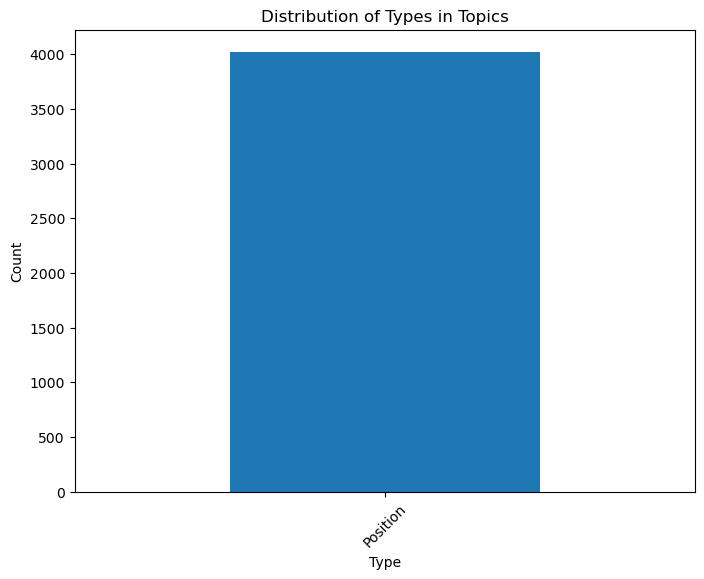

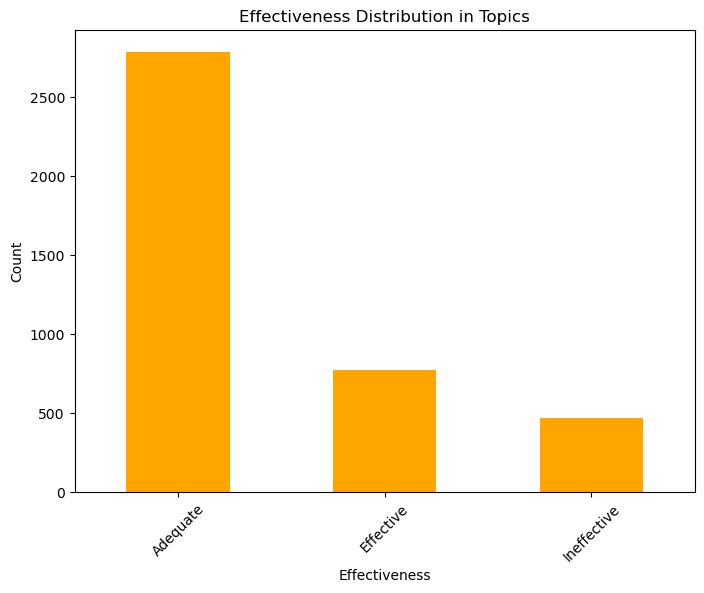

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze topics.csv
topics_summary = topics['type'].value_counts()
topics_effectiveness = topics['effectiveness'].value_counts()

# Plot type distribution in topics.csv
plt.figure(figsize=(8, 6))
topics_summary.plot(kind='bar')
plt.title("Distribution of Types in Topics")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot effectiveness in topics.csv
plt.figure(figsize=(8, 6))
topics_effectiveness.plot(kind='bar', color='orange')
plt.title("Effectiveness Distribution in Topics")
plt.xlabel("Effectiveness")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


# Opinions datasetin dağılımları

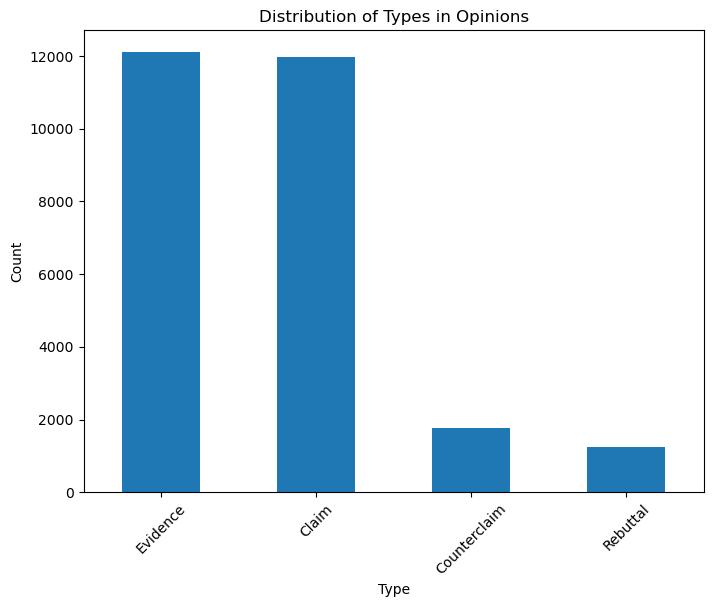

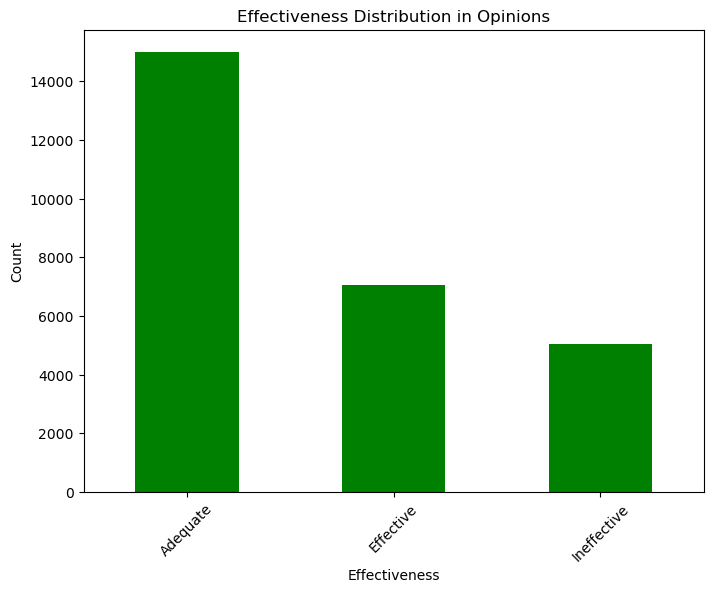

In [53]:

# Analyze opinions.csv
opinions_summary = opinions['type'].value_counts()
opinions_effectiveness = opinions['effectiveness'].value_counts()

# Plot type distribution in opinions.csv
plt.figure(figsize=(8, 6))
opinions_summary.plot(kind='bar')
plt.title("Distribution of Types in Opinions")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot effectiveness in opinions.csv
plt.figure(figsize=(8, 6))
opinions_effectiveness.plot(kind='bar', color='green')
plt.title("Effectiveness Distribution in Opinions")
plt.xlabel("Effectiveness")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## Conclusions datasetin dağılımları

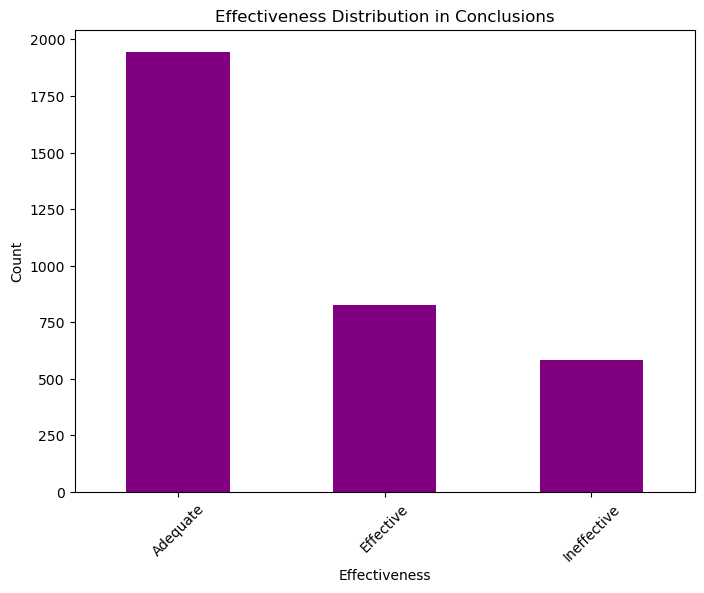

In [55]:

# Analyze conclusions.csv
conclusions_effectiveness = conclusions['effectiveness'].value_counts()

# Plot effectiveness in conclusions.csv
plt.figure(figsize=(8, 6))
conclusions_effectiveness.plot(kind='bar', color='purple')
plt.title("Effectiveness Distribution in Conclusions")
plt.xlabel("Effectiveness")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## Veri Analizi Sonrası Görüşlerim
- Görüşlerin büyük bir kısmı "Claim" ve "Evidence" türünden oluşmaktadır, bu da konuların destekleyici materyal ve iddialarla tartışıldığını gösteriyor.
- Hem görüşlerde hem de sonuçlarda "Adequate" etkinlikte olanların çoğunlukta olması, büyük bir kısmın yeterince etkili olduğunu, ancak bazı geliştirme alanlarının bulunduğunu göstermektedir.
- Türler arasında "Rebuttal" ve "Counterclaim" sayıca daha azdır, bu da karşıt görüşlerin ve cevapların daha az temsil edildiğini gösterebilir.
 -Bu analizler doğrultusunda bir sonraki adımda, verilerin gruplama ve sınıflandırma için nasıl işleneceğini belirleyebiliriz. Özellikle, yorumların belirli konulara göre gruplandırılması ve bu grupların genel bir sonuç cümlesine dönüştürülmesi için bir model geliştirmeyi planlıyorum

In [58]:
# Merge opinions with topics based on topic_id for contextual grouping
merged_df = opinions.merge(topics, on="topic_id", suffixes=("_opinion", "_topic"))

# Focus on key columns for analysis
merged_df = merged_df[["topic_id", "text_topic", "text_opinion", "type_opinion", "effectiveness_opinion"]]
merged_df

,topic_id,text_topic,text_opinion,type_opinion,effectiveness_opinion
0,007ACE74B050,"On my perspective, I think that the face is a ...",I think that the face is a natural landform be...,Claim,Adequate
1,007ACE74B050,"On my perspective, I think that the face is a ...","If life was on Mars, we would know by now. The...",Evidence,Adequate
2,007ACE74B050,"On my perspective, I think that the face is a ...",People thought that the face was formed by ali...,Counterclaim,Adequate
3,007ACE74B050,"On my perspective, I think that the face is a ...","though some say that life on Mars does exist, ...",Rebuttal,Ineffective
4,007ACE74B050,"On my perspective, I think that the face is a ...","It says in paragraph 7, on April 5, 1998, Mars...",Evidence,Adequate
...,...,...,...,...,...
26872,FF9E0379CD98,"I think is not benefit for student, that take ...",you cant work or cant study after school with ...,Evidence,Adequate
26873,FF9E0379CD98,"I think is not benefit for student, that take ...",in the end you cant take the class because is ...,Counterclaim,Adequate
26874,FFA381E58FC6,Advice is something that can impact a persons ...,For many people they don't like only asking on...,Claim,Adequate
26875,FFA381E58FC6,Advice is something that can impact a persons ...,also people have different views and opinions ...,Claim,Adequate


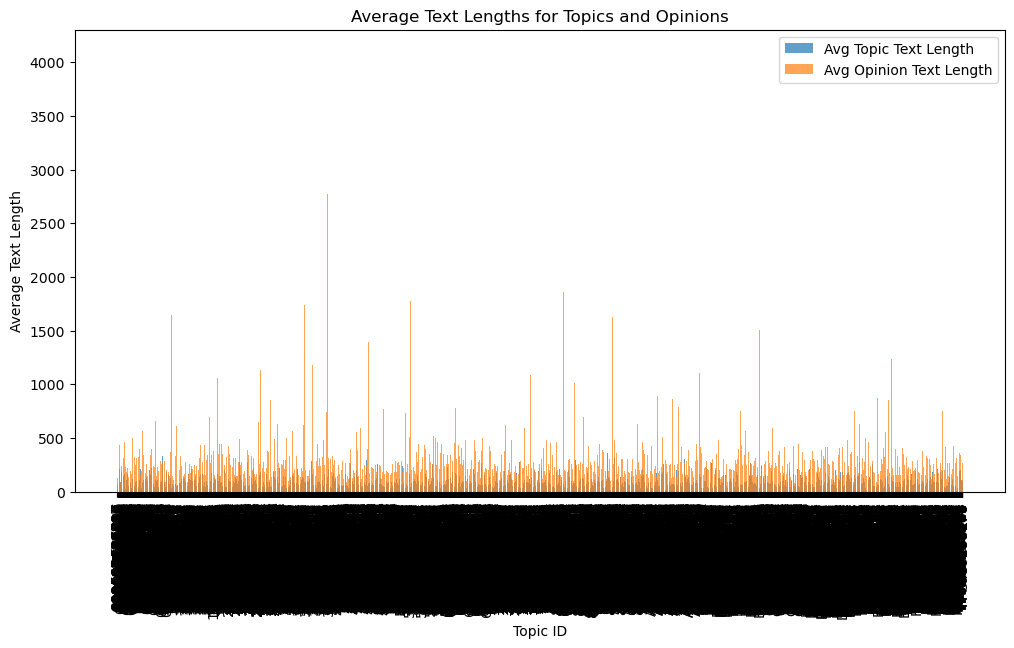

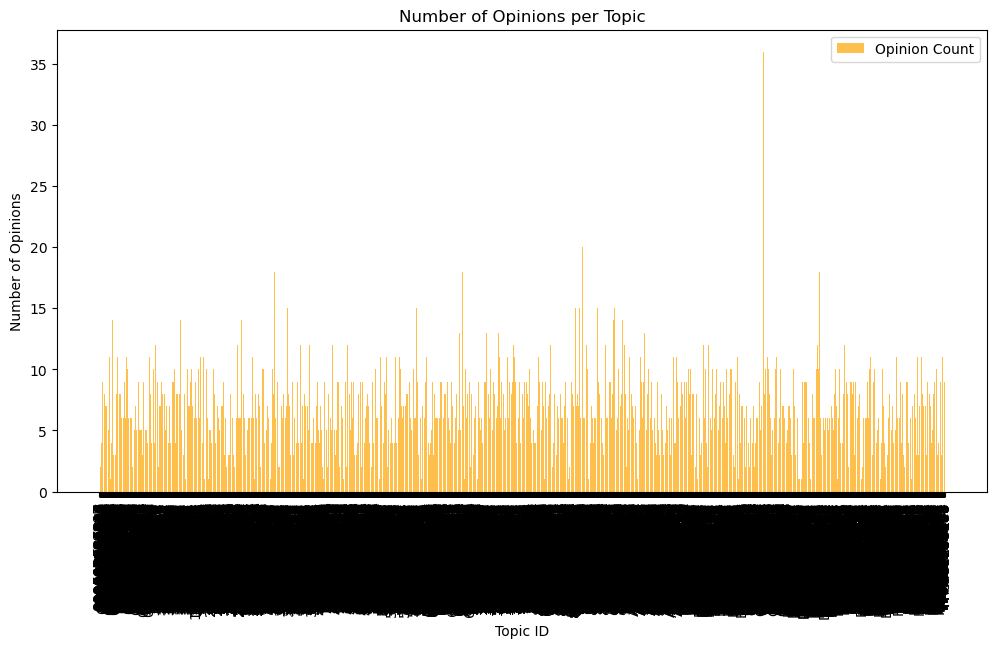

,topic_id,avg_topic_text_length,avg_opinion_text_length,opinion_count
0,00066EA9880D,137.0,393.833333,6
1,000E6DE9E817,39.0,126.700000,10
2,0016926B079C,58.0,125.700000,10
3,00203C45FC55,141.0,315.800000,10
4,0029F4D19C3F,256.0,138.166667,6
5,0045BE2791A2,104.0,308.500000,2
6,004AC288D833,43.0,100.071429,14
7,0056F3D261D5,164.0,268.111111,9
8,007ACE74B050,210.0,174.500000,6
9,007E0CBA8852,112.0,357.833333,6


In [63]:
# Calculate the average text lengths for topics and opinions
merged_df['topic_text_length'] = merged_df['text_topic'].apply(len)
merged_df['opinion_text_length'] = merged_df['text_opinion'].apply(len)

# Group by topic_id for analysis
topic_analysis = merged_df.groupby('topic_id').agg(
    avg_topic_text_length=('topic_text_length', 'mean'),
    avg_opinion_text_length=('opinion_text_length', 'mean'),
    opinion_count=('type_opinion', 'count')
).reset_index()


# Plot average text lengths for topics and opinions
plt.figure(figsize=(12, 6))
plt.bar(topic_analysis['topic_id'], topic_analysis['avg_topic_text_length'], alpha=0.7, label='Avg Topic Text Length')
plt.bar(topic_analysis['topic_id'], topic_analysis['avg_opinion_text_length'], alpha=0.7, label='Avg Opinion Text Length')
plt.title('Average Text Lengths for Topics and Opinions')
plt.xlabel('Topic ID')
plt.ylabel('Average Text Length')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Plot the count of opinions per topic
plt.figure(figsize=(12, 6))
plt.bar(topic_analysis['topic_id'], topic_analysis['opinion_count'], alpha=0.7, color='orange', label='Opinion Count')
plt.title('Number of Opinions per Topic')
plt.xlabel('Topic ID')
plt.ylabel('Number of Opinions')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Display the dataframe using Pandas' built-in display options for a clear view
topic_analysis.head(10)  # Displaying the first 10 rows for easier visualization


---

## **2. Veri Hazırlama ve Temizleme**

### **Dosyalar:** 
- `topics.csv` ve `opinions.csv`

### **Adımlar:**

1. **Metin Temizliği:**
   - Noktalama işaretlerini, gereksiz boşlukları ve **stopword**’leri kaldırdım.
   - Metinleri **küçük harfe** çevirdim.


---

In [65]:
import re 
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

custom_stopwords = set([...])  
def remove_stopwords_custom(text):
    tokens = text.split()
    tokens = [word for word in tokens if word not in custom_stopwords]
    return ' '.join(tokens)

opinions['cleaned_text'] = opinions['text'].apply(clean_text).apply(remove_stopwords_custom)


## **3. Modelleme**

### **Amaç:** 
Yorumların hangi türden olduğunu anlamak için sınıflandırmamız gerekir.

### **Yöntemler:**
- **Makine Öğrenimi:** 
  - CatBoost veya LightGBM.
- **Derin Öğrenme:** 
  - BERT, DistilBERT gibi modeller.

### **Adımlar:**
1. Veriyi rastgele train-test olarak ayırıyoruz.
2. Modeli eğit ve performansı değerlendirmek için:
   - **Accuracy**
   - **F1-Score**

---

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Veri Hazırlama
# 1. Metinleri ve türleri ayırma
texts = opinions['cleaned_text']  # Metinler
types = opinions['type']  # Türler (claim, counter_claim, etc.)

# 2. Metinleri eğitim ve test setine ayırma
X_train, X_test, y_train, y_test = train_test_split(
    texts, types, test_size=0.2, random_state=42, stratify=types
)

# 3. TF-IDF Dönüşümü
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 4. Etiketlerin kodlanması
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Hazırlık tamamlandı
X_train_tfidf.shape, X_test_tfidf.shape, len(label_encoder.classes_)


((21679, 5000), (5420, 5000), 4)


Eğitim seti: 21,679 metin örneği
Test seti: 5,420 metin örneği
TF-IDF Dönüşümü:

5,000 özellik (kelime temelli) çıkarıldı.
Etiketler:

4 sınıf mevcut: claim, counter_claim, evidence, rebuttal.
Şimdi, sınıflandırma modelimizi eğitelim ve performansını değerlendirelim.

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 91245
[LightGBM] [Info] Number of data points in the train set: 21679, number of used features: 2420
[LightGBM] [Info] Start training from score -0.816458
[LightGBM] [Info] Start training from score -2.727097
[LightGBM] [Info] Start training from score -0.805869
[LightGBM] [Info] Start training from score -3.081357
Training until validation scores don't improve for 250 rounds
[100]	training's multi_logloss: 0.475234	valid_1's multi_logloss: 0.676841
[200]	training's multi_logloss: 0.371055	valid_1's multi_logloss: 0.694865
[300]	training's multi_logloss: 0.301203	valid_1's multi_logloss: 0.71988
Early stopping, best iteration is:
[94]	training's multi_logloss: 0.483889	valid_1's multi_logloss: 0.676666
LightGBM Sınıflandırma Raporu:

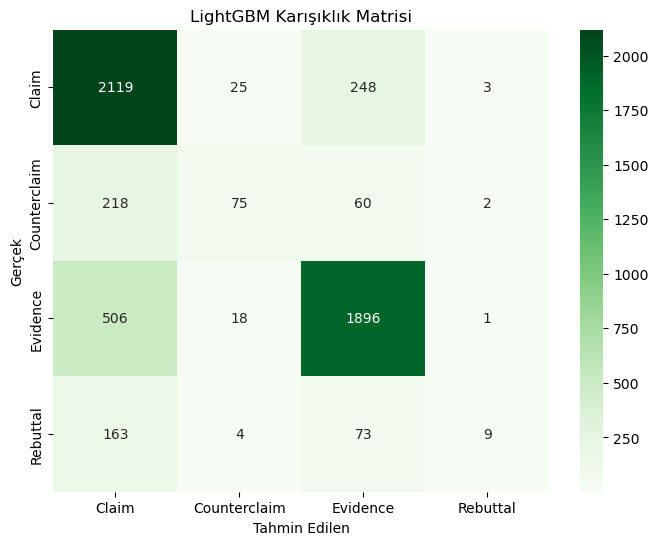

In [68]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


# LightGBM veri setini oluştur
train_data = lgb.Dataset(X_train_tfidf, label=y_train_encoded)
test_data = lgb.Dataset(X_test_tfidf, label=y_test_encoded, reference=train_data)

# LightGBM parametreleri
params = {
    "objective": "multiclass",
    "num_class": len(label_encoder.classes_),
    "metric": "multi_logloss",
    "boosting_type": "gbdt",
    "learning_rate": 0.1,
    "num_leaves": 31,
    "random_state": 42
}

# Modeli eğit
lgb_model = lgb.train(params, train_data, valid_sets=[train_data, test_data], num_boost_round=5000, early_stopping_rounds=250, verbose_eval=100)

# Tahmin yap
y_pred_lgb = lgb_model.predict(X_test_tfidf)
y_pred_lgb_classes = y_pred_lgb.argmax(axis=1)

# Performans değerlendirme
print("LightGBM Sınıflandırma Raporu:")
print(classification_report(y_test_encoded, y_pred_lgb_classes, target_names=label_encoder.classes_))

# Karışıklık matrisi görselleştirme
conf_matrix_lgb = confusion_matrix(y_test_encoded, y_pred_lgb_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgb, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("LightGBM Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()


# Genel Sonuçlar
- **Accuracy (Doğruluk):** %76 – Model, genel olarak %76 doğrulukla tahmin yapıyor. Ancak bu metrik sınıflar arasındaki dengesizliği dikkate almaz.
- **Macro Avg (Makro Ort.):**
  - **Precision:** 0.69 – Tüm sınıflar arasında ortalama olarak tahmin edilenler ne kadar doğru?
  - **Recall:** 0.48 – Tüm sınıflar arasında gerçek pozitiflerin ne kadarını yakalayabiliyor?
  - **F1-Score:** 0.49 – Düşük bir skor; özellikle az örneği bulunan sınıflardaki zayıf performansı gösteriyor.
- **Weighted Avg (Ağırlıklı Ort.):**
  - Precision, Recall ve F1, sınıf destekleri dikkate alınarak ağırlıklandırılmış ortalamalardır. Modelin ağırlıklı başarı metriği, genel doğruluğa daha yakın.

---

# Sınıflara Göre Performans
## Claim (İddia):
- **Precision:** 0.70
- **Recall:** 0.88
- **F1-Score:** 0.78
- **Başarılı:** Model, "Claim" sınıfını yüksek doğruluk ve duyarlılıkla sınıflandırabiliyor. Bu sınıf için yeterli örnek bulunması muhtemel.

## Counterclaim (Karşı İddia):
- **Precision:** 0.61
- **Recall:** 0.21
- **F1-Score:** 0.31
- **Zayıf:** Model, "Counterclaim" sınıfında düşük bir başarı sergiliyor. Recall'un çok düşük olması, bu sınıfı ayırt etmede zorlandığını gösteriyor. Sınıf dengesizliği etkili olabilir.

## Evidence (Kanıt):
- **Precision:** 0.83
- **Recall:** 0.78
- **F1-Score:** 0.81
- **Başarılı:** "Evidence" sınıfında model oldukça güçlü bir performans gösteriyor. Precision ve Recall dengeli ve yüksek.

## Rebuttal (Yanıt):
- **Precision:** 0.60
- **Recall:** 0.04
- **F1-Score:** 0.07
- **Kötü:** Model, "Rebuttal" sınıfını hemen hemen hiç yakalayamıyor (Recall %4). Bu, bu sınıfta yetersiz veri veya modelin bu sınıfı öğrenmekte zorlandığını gösterebilir.

---

# Modelin Başarısının Genel Yorumu
## Güçlü Yanlar:
- Model "Claim" ve "Evidence" sınıflarında yüksek başarı gösteriyor.
- Doğruluk oranı (%76) fena değil.

## Zayıf Yanlar:
- "Counterclaim" ve "Rebuttal" sınıflarında ciddi performans düşüşü var.
- Düşük Recall oranları, modelin az sayıda örneği olan sınıfları yeterince öğrenemediğini gösteriyor.

---

# Daha İyi Bir Model Performansı için BERT ile Model Kuruyorum


In [13]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader
import torch
from sklearn.metrics import classification_report

# Step 2.1: Tokenize and Prepare Data
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        tokens = self.tokenizer(
            text,
            padding="max_length",
            truncation=True,
            max_length=self.max_len,
            return_tensors="pt",
        )
        return {
            "input_ids": tokens["input_ids"].squeeze(0),
            "attention_mask": tokens["attention_mask"].squeeze(0),
            "label": torch.tensor(label, dtype=torch.long),
        }

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Prepare datasets
train_dataset = TextDataset(X_train.tolist(), y_train_encoded, tokenizer)
test_dataset = TextDataset(X_test.tolist(), y_test_encoded, tokenizer)

# Step 2.2: Define Model
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", num_labels=len(label_encoder.classes_)
)

# Step 2.3: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

# Define compute metrics function
def compute_metrics(p):
    preds = torch.argmax(torch.tensor(p.predictions), axis=1)
    return {
        "accuracy": (preds == torch.tensor(p.label_ids)).float().mean().item(),
    }

# Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Step 2.4: Train the Model
trainer.train()

# Step 2.5: Evaluate the Model
predictions = trainer.predict(test_dataset)
y_pred_bert = predictions.predictions.argmax(axis=1)

print("BERT Classification Report:")
print(classification_report(y_test_encoded, y_pred_bert, target_names=label_encoder.classes_))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/var/folders/w2/62hmzhgs03n6rtn8wg8lfz140000gn/T/ipykernel_12509/2698305435.py:69: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.589000,0.515126,0.812177
2,0.306700,0.532322,0.817343
3,0.231300,0.666213,0.814760


BERT Classification Report:
              precision    recall  f1-score   support

       Claim       0.78      0.91      0.84      2395
Counterclaim       0.67      0.57      0.62       355
    Evidence       0.91      0.79      0.85      2421
    Rebuttal       0.64      0.51      0.57       249

    accuracy                           0.82      5420
   macro avg       0.75      0.70      0.72      5420
weighted avg       0.82      0.82      0.82      5420



---

# Genel Performans Karşılaştırması

## Accuracy (Doğruluk):
- **LightGBM:** %76
- **BERT:** %82
- **Yorum:** BERT modeli, doğruluk açısından belirgin bir şekilde daha başarılıdır. %6'lık bir artış, sınıflandırma performansında anlamlı bir iyileşmeyi işaret eder.

## Macro Average (Makro Ortalama):
- **LightGBM Precision:** 0.69 → **BERT Precision:** 0.75
- **LightGBM Recall:** 0.48 → **BERT Recall:** 0.70
- **LightGBM F1-Score:** 0.49 → **BERT F1-Score:** 0.72
- **Yorum:** BERT modeli, özellikle Recall metriklerinde büyük bir gelişme göstermiştir. Bu, az sayıda örneği bulunan sınıflarda bile daha fazla doğru pozitif yakalayabildiğini gösterir.

## Weighted Average (Ağırlıklı Ortalama):
- **LightGBM:** Precision, Recall ve F1-Score metrikleri %73-76 arasında.
- **BERT:** Tüm metriklerde %82.
- **Yorum:** BERT modeli, tüm sınıflar için genel başarı oranını artırmıştır.

---

# Sınıflara Göre Performans Karşılaştırması

## Claim (İddia):
- **LightGBM F1-Score:** 0.78 → **BERT F1-Score:** 0.84
- **Yorum:** BERT modeli, "Claim" sınıfında zaten iyi olan performansı daha da ileriye taşımıştır.

## Counterclaim (Karşı İddia):
- **LightGBM F1-Score:** 0.31 → **BERT F1-Score:** 0.62
- **Yorum:** BERT modeli, bu sınıfta çok daha güçlü bir performans sergilemiştir. Recall oranının %21'den %57'ye yükselmesi, "Counterclaim" sınıfındaki gerçek pozitifleri yakalamada önemli bir iyileşme olduğunu gösterir.

## Evidence (Kanıt):
- **LightGBM F1-Score:** 0.81 → **BERT F1-Score:** 0.85
- **Yorum:** BERT modeli, bu sınıfta iyi olan performansı daha da iyileştirmiştir. Özellikle Precision'ın %91 olması, doğru tahminlerin kalitesini vurgular.

## Rebuttal (Yanıt):
- **LightGBM F1-Score:** 0.07 → **BERT F1-Score:** 0.57
- **Yorum:** BERT modeli, LightGBM'nin başarısız olduğu bu sınıfta ciddi bir iyileşme sağlamıştır. Recall %4'ten %51'e yükselmiş, bu sınıfın artık daha iyi bir şekilde ayırt edilebildiğini göstermiştir.

---

# Model Eğitimi ve Genel Gözlemler

## Eğitim ve Validasyon Kayıpları (Loss):
- Eğitim sırasında BERT modelinin kaybı her epoch'ta düşmüş, ancak validasyon kaybı Epoch 2'den sonra artış göstermiştir.
- **Overfitting:** Epoch 3'te validasyon kaybının artması, modelin overfit olma eğilimi gösterdiğini işaret edebilir. Bu, daha fazla epoch yerine erken durdurma stratejisinin kullanılmasının faydalı olabileceğini gösterir.

## Genel Doğruluk Artışı:
- %76'dan %82'ye yükselen doğruluk oranı, BERT modelinin LightGBM'ye kıyasla daha iyi bir sınıflandırıcı olduğunu göstermektedir.

---

# Genel Sonuç ve Öneriler

## Güçlü Yönler:
- BERT modeli, tüm sınıflarda özellikle "Counterclaim" ve "Rebuttal" gibi azınlık sınıflarında belirgin bir gelişme sağlamıştır.
- Genel doğruluk, Recall ve F1 metrikleri artmıştır.

## Zayıf Yönler ve Öneriler:
- Validasyon kaybındaki artış, modeli overfitting'e karşı koruma ihtiyacını göstermektedir. **Erken durdurma** veya **Dropout** gibi yöntemlerle iyileştirme yapılabilir.
- BERT modelinin hesaplama maliyeti LightGBM'den daha yüksektir. Daha hafif bir model, performans kaybı olmadan kullanılabilir mi diye araştırılabilir.

---

Sonuç olarak, BERT modeli genel performansı önemli ölçüde artırmış ve özellikle az örneği bulunan sınıflarda daha etkili olmuştur. Bu model, LightGBM'ye kıyasla önerilir.


In [70]:
# Model Export 

model_save_path = "./bert_fine_tuned_model"
tokenizer.save_pretrained(model_save_path)
model.save_pretrained(model_save_path)

In [71]:
# Model Import

model_load_path = "./bert_fine_tuned_model"
tokenizer = BertTokenizer.from_pretrained(model_load_path)
model = BertForSequenceClassification.from_pretrained(model_load_path)

In [77]:
def predict_type(text):
    """
    Metni sınıflandırır ve sınıf adını döndürür.

    Args:
        text (str): Sınıflandırılacak metin.

    Returns:
        str: Tahmin edilen sınıf adı.
    """
    # Metni tokenize et
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    inputs = {key: val.to(model.device) for key, val in inputs.items()}  # Cihazla uyumlu hale getir
    
    # Modeli tahmin için kullan
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Logitlerden sınıf tahmini
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()
    
    # Sınıf adını döndür
    predicted_label = label_encoder.inverse_transform([predicted_class])[0]
    return predicted_label


In [79]:
# Test için örnek kullanım:
text_example = conclusions.iloc[0]['text'] 
predicted_label = predict_type(text_example)
print(f"Text: {text_example}")
print("         ")
print(f"Predicted Type: {predicted_label}")

Text: Though people were not satified about how the landform was a natural landform, in all, we new that alieans did not form the face. I would like to know how the landform was formed. we know now that life on Mars doesn't exist. 
         
Predicted Type: Claim


In [81]:

test_topic_ids = conclusions['topic_id'].unique()[:10]

# Test için seçilen sonuç metinleri
test_conclusions = conclusions[conclusions['topic_id'].isin(test_topic_ids)].copy()

# Tahmin edilen türleri ekleyin
test_conclusions['predicted_type_name'] = test_conclusions['text'].apply(predict_type)

# Görüşleri gruplama
grouped_opinions = opinions[opinions['topic_id'].isin(test_topic_ids)].groupby('topic_id').apply(
    lambda x: {
        'Claim': x[x['type'] == 'Claim']['text'].tolist(),
        'Counterclaim': x[x['type'] == 'Counterclaim']['text'].tolist(),
        'Evidence': x[x['type'] == 'Evidence']['text'].tolist(),
        'Rebuttal': x[x['type'] == 'Rebuttal']['text'].tolist()
    }
).reset_index(name='grouped_texts')

# Sonuçları birleştirme
final_output = pd.merge(
    test_conclusions[['topic_id', 'text', 'predicted_type_name']],
    grouped_opinions,
    on='topic_id',
    how='left'
)

In [85]:
final_output

,topic_id,text,predicted_type_name,grouped_texts
0,007ACE74B050,Though people were not satified about how the ...,Claim,{'Claim': ['I think that the face is a natural...
1,00944C693682,Individual car use isn't bad. Millions of indi...,Evidence,"{'Claim': ['stress. ', 'the environment suffer..."
2,00BD97EA4041,To conclusion computers in school shouldn't de...,Claim,{'Claim': ['It wouldn't change the emotion the...
3,00C6E82FE5BA,The reasons why i said that this would be unva...,Claim,{'Claim': ['the fact that its really easy for ...
4,013B9AA6B9DB,"So, in conclusion, the famous face on Mars was...",Claim,{'Claim': ['that the presumed face was a landf...
5,0158970BC5D2,It is important to keep students' minds engage...,Evidence,"{'Claim': ['easy plagiarism ', 'teachers' know..."
6,015BB7DA58EE,In conclution we could make our childrens clas...,Claim,{'Claim': ['Well to start off the technology h...
7,0167BBA84E43,Just because it looks as if it is something co...,Rebuttal,{'Claim': ['The photo isn't clearly shown as a...
8,0168325D0E24,"In all actuality, how many people dont realize...",Claim,{'Claim': ['It actually helped having cars sto...
9,0168325D0E24,"In one acrtical, it say there is a place where...",Claim,{'Claim': ['It actually helped having cars sto...


In [97]:
final_output["grouped_texts"][0]

{'Claim': ['I think that the face is a natural landform because there is no life on Mars that we have descovered yet '],
 'Counterclaim': ['People thought that the face was formed by alieans because they thought that there was life on Mars. ',
  "Everyone who thought it was made by alieans even though it wasn't, was not satisfied. I think they were not satisfied because they have thought since 1976 that it was really formed by alieans. "],
 'Evidence': ['If life was on Mars, we would know by now. The reason why I think it is a natural landform because, nobody live on Mars in order to create the figure. It says in paragraph 9, "It\'s not easy to target Cydonia," in which he is saying that its not easy to know if it is a natural landform at this point. In all that they\'re saying, its probably a natural landform. ',
  'It says in paragraph 7, on April 5, 1998, Mars Global Surveyor flew over Cydonia for the first time. Michael Malin took a picture of Mars with his Orbiter Camera, that the

In [98]:
def get_related_text(text, final_output, grouped_column="grouped_texts"):
    """
    Verilen bir metni sınıflandır ve aynı topic_id'den aynı sınıfa ait başka bir metin döndür.

    Args:
        text (str): Sınıflandırılacak metin.
        final_output (pd.DataFrame): Ana veri çerçevesi, grouped_texts içerir.
        grouped_column (str): Gruplanmış metinleri içeren sütun adı.

    Returns:
        str: Aynı topic_id içinden aynı sınıfa ait başka bir metin veya uygun metin bulunamadıysa bir mesaj.
    """
    # Metni sınıflandır
    predicted_type_name = predict_type(text)
    
    # Text dataset'te mevcut mu kontrol et
    topic_id_row = final_output[final_output['text'] == text]
    if topic_id_row.empty:
        return "Text not found in the dataset."

    # Topic ID'yi al
    topic_id = topic_id_row.iloc[0]['topic_id']

    # Related texts for the same type
    related_texts = final_output[final_output['topic_id'] == topic_id].iloc[0][grouped_column][predicted_type_name]
    if len(related_texts) > 0:
        # Aynı sınıfa ait farklı bir metin döndür
        for related_text in related_texts:
            if related_text != text:
                return related_text
        return f"No other '{predicted_type_name}' texts available in the same topic."
    else:
        return f"No '{predicted_type_name}' texts found in grouped_texts."

# Örnek kullanım
example_text = final_output.iloc[0]['text']  # Final output'tan bir metin seçin
result = get_related_text(example_text, final_output)
print("Input Text:", example_text)
print('   ')
print("Related Text:", result)


Input Text: Though people were not satified about how the landform was a natural landform, in all, we new that alieans did not form the face. I would like to know how the landform was formed. we know now that life on Mars doesn't exist. 
   
Related Text: I think that the face is a natural landform because there is no life on Mars that we have descovered yet 


In [ ]:
import streamlit as st
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Model ve tokenizer'ı yükle
@st.cache_resource

# Model Import

model_load_path = "./bert_fine_tuned_model"
tokenizer = BertTokenizer.from_pretrained(model_load_path)
model = BertForSequenceClassification.from_pretrained(model_load_path)

model, tokenizer = load_model_and_tokenizer()

# Tür haritası
type_mapping = {0: "Claim", 1: "Counterclaim", 2: "Evidence", 3: "Rebuttal"}

# Metni sınıflandırma fonksiyonu
def predict_type(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()
    return predicted_class

# İlgili metni bulma fonksiyonu
def get_related_text(text, final_output, grouped_column="grouped_texts"):
    predicted_class = predict_type(text)
    predicted_type_name = type_mapping[predicted_class]
    
    topic_id_row = final_output[final_output['text'] == text]
    if topic_id_row.empty:
        return "Text not found in the dataset."

    topic_id = topic_id_row.iloc[0]['topic_id']

    related_texts = final_output[final_output['topic_id'] == topic_id].iloc[0][grouped_column][predicted_type_name]
    if len(related_texts) > 0:
        for related_text in related_texts:
            if related_text != text:
                return related_text
        return f"No other '{predicted_type_name}' texts available in the same topic."
    else:
        return f"No '{predicted_type_name}' texts found in grouped_texts."

# Veri setlerini yükle
@st.cache_data
def load_data():
    conclusions = pd.read_csv("path_to_conclusions.csv")
    opinions = pd.read_csv("path_to_opinions.csv")
    return conclusions, opinions

conclusions, opinions = load_data()

# Veri işleme
test_topic_ids = conclusions['topic_id'].unique()[:10]

test_conclusions = conclusions[conclusions['topic_id'].isin(test_topic_ids)].copy()
test_conclusions['predicted_type_name'] = test_conclusions['text'].apply(predict_type)

grouped_opinions = opinions[opinions['topic_id'].isin(test_topic_ids)].groupby('topic_id').apply(
    lambda x: {
        'Claim': x[x['type'] == 'Claim']['text'].tolist(),
        'Counterclaim': x[x['type'] == 'Counterclaim']['text'].tolist(),
        'Evidence': x[x['type'] == 'Evidence']['text'].tolist(),
        'Rebuttal': x[x['type'] == 'Rebuttal']['text'].tolist()
    }
).reset_index(name='grouped_texts')

final_output = pd.merge(
    test_conclusions[['topic_id', 'text', 'predicted_type_name']],
    grouped_opinions,
    on='topic_id',
    how='left'
)

# Streamlit arayüzü
st.title("Text Classification and Related Text Finder")

# Kullanıcıdan giriş al
input_text = st.text_area("Enter a text for classification:", "")

if st.button("Classify and Find Related Text"):
    if input_text.strip() == "":
        st.warning("Please enter a text to classify.")
    else:
        # Sınıflandırma ve ilgili metni bulma
        predicted_type_name = type_mapping[predict_type(input_text)]
        related_text = get_related_text(input_text, final_output)
        
        # Sonuçları göster
        st.write(f"Predicted Type: **{predicted_type_name}**")
        st.write(f"Related Text: **{related_text}**")


In [ ]:
ls /Users/kerimcanarslan/nlp_projct/
cd /Users/kerimcanarslan/nlp_projct/
python3 -m streamlit run nlp_app.py